In [ ]:
import nengo

model = nengo.Network()
with model:
    stim = nengo.Node([0])
    
    sensory = nengo.Ensemble(n_neurons=100, dimensions=2)
    
    spatial = nengo.Ensemble(n_neurons=100, dimensions=2)
    
    c = nengo.Connection(sensory, spatial, learning_rule_type=nengo.PES())
        
    error = nengo.Ensemble(n_neurons=100, dimensions=2)
    nengo.Connection(error, c.learning_rule)
    
    nengo.Connection(spatial, error)
    correct = nengo.Node([0,0])
    nengo.Connection(correct, error, transform=-1)

In [4]:
import nengo
import numpy as np

model = nengo.Network()
with model:
    stim = nengo.Node([0])
    
    sensory = nengo.Ensemble(n_neurons=100, dimensions=2, intercepts=nengo.dists.Uniform(0.7,0.95))
    
    spatial = nengo.Ensemble(n_neurons=100, dimensions=2, intercepts=nengo.dists.Uniform(0.7,0.95))
    
    nengo.Connection(stim, sensory, function=lambda x: (np.sin(x*np.pi), np.cos(x*np.pi)))
    nengo.Connection(sensory, spatial)


In [5]:
import nengo_gui.ipython
nengo_gui.ipython.IPythonViz(model)

In [419]:
import nengo
import numpy as np

def run_sim(input_value=0):
    model = nengo.Network(seed=3)
    with model:
        stim = nengo.Node([input_value])

        sensory = nengo.Ensemble(n_neurons=75, dimensions=2, intercepts=nengo.dists.Uniform(0.87,0.91))

        spatial = nengo.Ensemble(n_neurons=75, dimensions=2, intercepts=nengo.dists.Uniform(0.87,0.91))

        nengo.Connection(stim, sensory, function=lambda x: (np.sin(x*np.pi/2), np.cos(x*np.pi/2)))
        nengo.Connection(sensory, spatial)
        #def rotate(x):
        #    theta = np.arctan2(x[1], x[0])
        #    theta += 0.1
        #    return np.sin(theta), np.cos(theta)
        #nengo.Connection(sensory, spatial, function=rotate)

        sensory_probe = nengo.Probe(sensory.neurons)
        spatial_probe = nengo.Probe(spatial.neurons)
    
    sim = nengo.Simulator(model)
    with sim:
        sim.run(0.05)
    return np.mean(sim.data[spatial_probe], axis=0)


In [420]:
values = np.linspace(-1,1, 45)
rates = []
for v in values:
    out = run_sim(v)
    #out /= np.max(out)
    rates.append(out)
    


Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:01.                                                 
Simulation finished in 0:00:

In [421]:
rates = np.array(rates)
print rates.shape
%matplotlib inline

(45, 75)


In [422]:
#assume that cells with similar peak centers would fall under the same
#multicellular recording therefore peaks are done relative to all values with similar peaks
nrm_rates = []
rate_peaks = np.max(rates, axis=1)
max_i = np.argmax(rates, axis=0)
for j, i in enumerate(max_i):
    nrm_rates.append(rates[:, j]/rate_peaks[i])
nrm_rates = np.array(nrm_rates).transpose()
print nrm_rates[:, 0]
#print rates[0, 20], rates[1, 19], rates[8, 5]


[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.16666667  0.08333333  0.          0.08333333  0.58333333  0.66666667
  0.66666667  0.66666667  0.58333333  0.5         0.5         0.58333333
  0.58333333  0.66666667  0.58333333  0.58333333  0.33333333]


(8, 31)


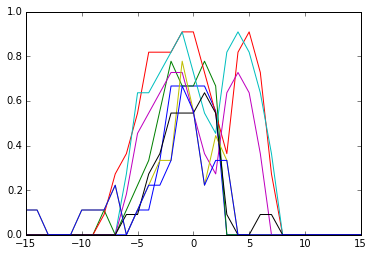

In [423]:
a = [[(i, x) for i, x in enumerate(nrm_rates[:, y]) if x >= 0.5] for y in range(nrm_rates.shape[1])]
#below uses the protocol from the paper where the center value of the values with >= 50% of
#the max value is used as the max
maxes = [(i, b[len(b)/2][0]) for i, b in enumerate(a) if len(b) > 0]
max_cuts = [nrm_rates[mx-15:mx+16, i] for i, mx in maxes if mx >= 15 and mx <= 29]
max_cuts = np.array(max_cuts)
print max_cuts.shape
for v in range(max_cuts.shape[0]):
    pylab.plot(range(-15, 16), max_cuts[v, :])

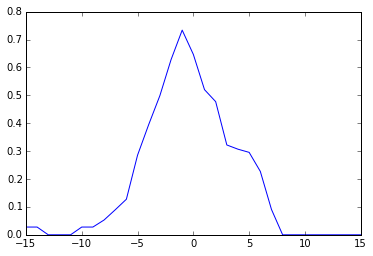

In [424]:
pylab.plot(range(-15, 16), np.mean(max_cuts[:, :], axis=0))